In [10]:
using OrdinaryDiffEq, ForwardDiff, Distributions, RandomNumbers, NPZ, PyPlot, StaticArrays, DiffEqPhysics

┌ Info: Precompiling DiffEqPhysics [055956cb-9e8b-5191-98cc-73ae4a59e68a]
└ @ Base loading.jl:1273


In [9]:
using Pkg
Pkg.add("DiffEqPhysics")

 Resolving package versions...
 Installed CompilerSupportLibraries_jll ─ v0.3.3+0
 Installed Zlib_jll ───────────────────── v1.2.11+9
 Installed DiffEqPhysics ──────────────── v3.5.0
 Installed Parsers ────────────────────── v1.0.1
 Installed NLSolversBase ──────────────── v7.6.1
 Installed LineSearches ───────────────── v7.0.1
 Installed NLsolve ────────────────────── v4.3.0
 Installed DataStructures ─────────────── v0.17.11
 Installed DiffEqCallbacks ────────────── v2.12.1
  Updating `~/.julia/environments/v1.3/Project.toml`
  [055956cb] + DiffEqPhysics v3.5.0
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [e66e0078] ↑ CompilerSupportLibraries_jll v0.3.2+0 ⇒ v0.3.3+0
  [864edb3b] ↑ DataStructures v0.17.10 ⇒ v0.17.11
  [459566f4] + DiffEqCallbacks v2.12.1
  [055956cb] + DiffEqPhysics v3.5.0
  [d3d80556] + LineSearches v7.0.1
  [d41bc354] + NLSolversBase v7.6.1
  [2774e3e8] + NLsolve v4.3.0
  [69de0a69] ↑ Parsers v1.0.0 ⇒ v1.0.1
  [83775a58] ↑ Zlib_jll v1.2.11+8 ⇒ v1.2.11+9


In [28]:
Ns=100
Times=10
listas=[0.6]
N=0
solu=0
w=0
alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 7*omega0/2
s = 0.1
a = 2.
b = 1.
Hpart!(x,p)=p^2. /2. -0.5*2. *x^2. +0.25*1. *x^4.
Hosci!(x,p,w)=p^2. /(0.1*2.)+0.05*w^2. *x^2.

Hosci! (generic function with 1 method)

 10.644650 seconds (123.28 M allocations: 5.282 GiB, 11.05% gc time)


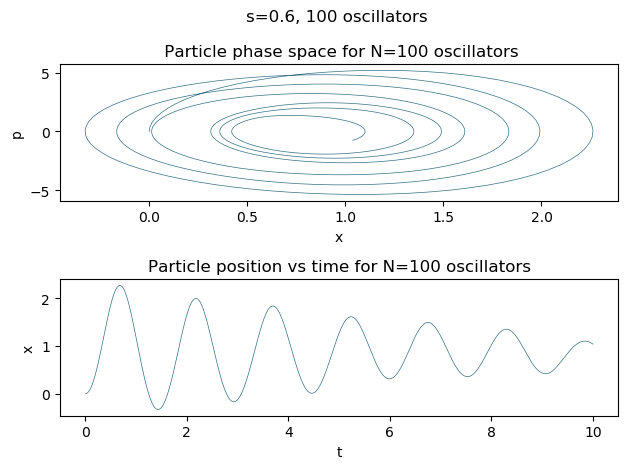

s=0.6
g= [0.05524444432194112, 0.06811624438432315, 0.0770436192638384, 0.08411675681276332, 0.09007939683009285, 0.09529181967109837, 0.09995887876229026, 0.10420936155504275, 0.10813005920609142, 0.11178252921889754, 0.11521218185091033, 0.11845357761430801, 0.12153369674975976, 0.12447405169354553, 0.1272921044794852, 0.13000224835486568, 0.13261650616042125, 0.13514503887652388, 0.13759652350976456, 0.13997843893630704, 0.1422972855651752, 0.144558756545051, 0.1467678729108411, 0.14892909150040176, 0.15104639203642317, 0.15312334807460629, 0.15516318532154755, 0.15716882996599668, 0.1591429490414436, 0.16108798437682625, 0.16300618134825268, 0.1648996133854317, 0.16677020298916698, 0.16861973986465204, 0.17044989665780086, 0.1722622426900751, 0.1740582560150523, 0.17583933406278165, 0.1776068030923892, 0.17936192663686565, 0.18110591309456742, 0.18283992259819035, 0.18456507327271493, 0.18628244697817592, 0.1879930946204126, 0.18969804110266225, 0.1913982899825686, 0.19309482789255

In [29]:
function initial_sampling(Eb,w1,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end

function pair(Eb,w1,mb,nume)
    nums=nume
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

#alpha = 0.2
#omega0 = 2 # (frequencia del sistema de dos niveles)
#wc = 5*omega0/2
#s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[10,15,20,25,30,35,40,50,60]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]

#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
#a=2.
#b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
#g=g .* 0. .+ 0.3/N

dts=0.1*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.

for i in 2:2:N+1
    i=Int(i)
    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],1.1 *pi/4.)
end
for i in 3:2:N+1
    i=Int(i)
    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],1. *pi/4.)
end
#for i in 4:3:N+1
#        println(i)
#    i=Int(i)
#    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],-1. *pi/4.)
#end
    

#for i in 2:N+1
#    i=Int(i)
#    initial_position[i], initial_momentum[i]=initial_sampling(Es[i],w[i],m[i])
#end


initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts, abstol=1e-14, reltol=1e-14) #CalvoSanz4
    solu=sol
fig, axes = subplots(nrows=2, ncols=1)

subplot(2, 1, 1)

title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)

title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()

#savefig("ohmicos_s/s$s.png")
#clf()
println("s=$s")
println("g= ",g[2:end])
println("w= ", w[2:end])
    println(typeof(pdot))
    println(typeof(qdot))
end


[0.0, 0.2769225194697152, 0.6295776426148444, 0.14144885026109147, 0.24207408816702997, 0.31219833486614773, 0.22453514780987047, 0.45223664621288684, 0.5437452877223214, 0.16856991111985442, 0.4156560262054848, 0.13346253711948616, 0.1592460285203521, 0.41081765774634127, 0.2204137883142376, 0.32660178650564564, 0.20773214591358197, 0.10310424987430701, 0.4194397842145408, 0.34160914756563737, 0.40473303221675044, 0.1745748172059177, 0.11956998409080784, 0.24436215060526104, 0.11976626941340855, 0.6758533744009547, 0.30581506860252733, 0.22475536287625383, 0.6419576965868096, 0.2249005494310774, 0.13094024170599386, 0.20097770321007577, 0.24975071281235894, 0.08629745307307744, 0.2544678643636046, 0.4073319071950909, 0.374506641016555, 0.387771008115256, 0.3083461130456571, 0.14530023033562578, 0.3208486324373464, 0.34211751709605775, 0.11141697806503702, 0.1216710856770833, 0.22165386770175682, 0.27061631015225596, 0.39475373180894696, 0.3997198782545806, 0.2719808003106974, 0.434349

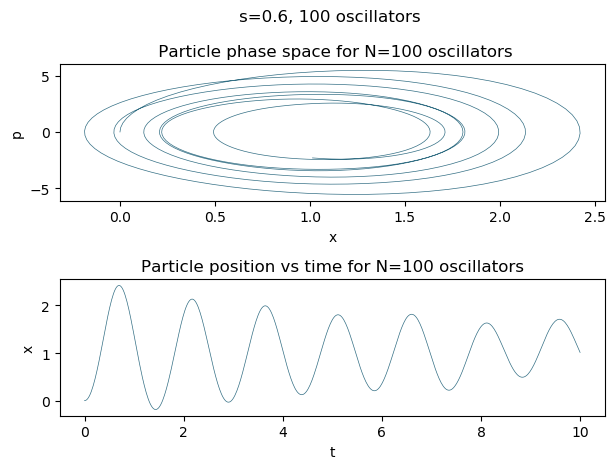

s=0.6
g= [0.05524444432194112, 0.06811624438432315, 0.0770436192638384, 0.08411675681276332, 0.09007939683009285, 0.09529181967109837, 0.09995887876229026, 0.10420936155504275, 0.10813005920609142, 0.11178252921889754, 0.11521218185091033, 0.11845357761430801, 0.12153369674975976, 0.12447405169354553, 0.1272921044794852, 0.13000224835486568, 0.13261650616042125, 0.13514503887652388, 0.13759652350976456, 0.13997843893630704, 0.1422972855651752, 0.144558756545051, 0.1467678729108411, 0.14892909150040176, 0.15104639203642317, 0.15312334807460629, 0.15516318532154755, 0.15716882996599668, 0.1591429490414436, 0.16108798437682625, 0.16300618134825268, 0.1648996133854317, 0.16677020298916698, 0.16861973986465204, 0.17044989665780086, 0.1722622426900751, 0.1740582560150523, 0.17583933406278165, 0.1776068030923892, 0.17936192663686565, 0.18110591309456742, 0.18283992259819035, 0.18456507327271493, 0.18628244697817592, 0.1879930946204126, 0.18969804110266225, 0.1913982899825686, 0.19309482789255

In [30]:
function initial_sampling(Eb,w1,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end

function pair(Eb,w1,mb,nume)
    nums=nume
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

#alpha = 0.2
#omega0 = 2 # (frequencia del sistema de dos niveles)
#wc = 5*omega0/2
#s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[10,15,20,25,30,35,40,50,60]
#listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
#listas=[0.4]
for j in 1:size(listas)[1]
    s=listas[j]

#N=numeros[ii]
N=Ns
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
#a=2.
#b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=Times
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
#g=g .* 0. .+ 0.3/N

dts=0.1*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(p,q,params)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
#pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
#qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
    

for i in 2:2:N+1
    i=Int(i)
    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],1.1 *pi/4.)
end
for i in 3:2:N+1
    i=Int(i)
    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],1. *pi/4.)
end
#for i in 4:3:N+1
#        println(i)
#    i=Int(i)
#    initial_position[i], initial_momentum[i]=pair(Es[i],w[i],m[i],-1. *pi/4.)
#end
    

#for i in 2:N+1
#    i=Int(i)
#    initial_position[i], initial_momentum[i]=initial_sampling(Es[i],w[i],m[i])
#end


initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]

#function p0(inip)
println(initial_momentum)
println(initial_position)
        
 
#prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
prob = HamiltonianProblem(Hsys, initial_momentum, initial_position, tspan)

@time sol = solve(prob, CalvoSanz4(), dt=dts, abstol=1e-14, reltol=1e-14) #CalvoSanz4
    solu=sol
fig, axes = subplots(nrows=2, ncols=1)

subplot(2, 1, 1)

title("s=$s, $N oscillators \n \n Particle phase space for N=$N oscillators")
xlabel("x")
ylabel("p")
plot(sol[N+2,:],sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)

title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()

#savefig("ohmicos_s/s$s.png")
#clf()
println("s=$s")
println("g= ",g[2:end])
println("w= ", w[2:end])
#    println(typeof(pdot))
#    println(typeof(qdot))
end

In [22]:
bbb=[1,2,3]
@SVector [bbb[1],bbb[2],bbb[3]]

3-element SArray{Tuple{3},Int64,1,3} with indices SOneTo(3):
 1
 2
 3